In [33]:
import pandas as pd
import requests
from arcgis import GIS
from arcgis.features import GeoAccessor
gis = GIS()

In [2]:
theURL = 'https://supercharge.info/data'

In [3]:
dfs = pd.read_html(theURL)
len(dfs)

7

In [15]:
dfs[2]

,Supercharger,Street Address,City,State,Zip,Country,Stalls,GPS,Elev(m),Status,Open Date,Links


In [21]:
df = pd.read_csv('data.txt',sep='\t')
df.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,GPS,Elev(m),Status,Open Date,Links
0,"Williams, CA",464 6th Street,Williams,CA,95987,USA,12,"39.15608, -122.149408",25,OPEN,2019-12-19,gmap | forum | tesla
1,"North Bend, WA",46600 SE North Bend Way,North Bend,WA,98045,USA,8,"47.468107, -121.716454",209,OPEN,2019-12-19,gmap | forum | tesla
2,"Guaynabo, PR",2–98 Calle Tabonuco,Guaynabo,PR,00968,USA,2,"18.405993, -66.106131",15,OPEN,2019-12-18,gmap | forum
3,"Burleson, TX",3313 S. Burleson Blvd,Burleson,TX,76009,USA,10,"32.463609, -97.264284",257,OPEN,2019-12-15,gmap | forum
4,"Boonton, NJ",550 Myrtle Avenue,Boonton,NJ,07005,USA,10,"40.907627, -74.3976",118,OPEN,2019-12-14,gmap | forum | tesla


In [47]:
df['Lat'] = df['GPS'].apply(lambda x :float(x.split(',')[0]))
df['Lng'] = df['GPS'].apply(lambda x :float(x.split(',')[1]))

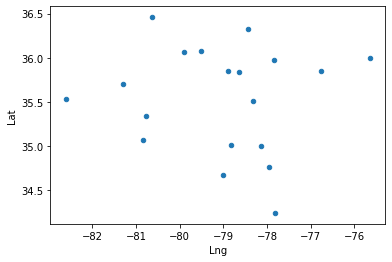

In [50]:
dfNC = df.query('State == "NC"').copy()
dfNC.plot(x="Lng",y="Lat",kind='scatter')

In [51]:
sdf = GeoAccessor.from_xy(df,x_column="Lng",y_column="Lat")

In [55]:
sdf[sdf['State']=='TN'].spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))